In [1]:
# %%
from pathlib import Path

import numpy as np
import scvelo as scv
import torch

from deepvelo.utils.velocity import velocity
from deepvelo.utils.util import update_dict
from deepvelo import train, Constants

# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params(
    "scvelo", transparent=False
)  # for beautified visualization


Using backend: pytorch


In [2]:
adata = scv.datasets.dentategyrus()
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_neighbors=30, n_pcs=30)


Filtered out 10340 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [3]:
def test(ad, configs, save_path=None):
    adata = ad.copy()
    velocity(adata, mask_zero=False)
    trainer = train(adata, configs)
    scv.tl.velocity_graph(adata, n_jobs=8)

    # velocity plot
    scv.pl.velocity_embedding_stream(
        adata,
        basis="umap",
        color="clusters",
        legend_fontsize=9,
        dpi=150,
        legend_loc="none",
        save=save_path,
    )


computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [64, 64], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.001, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 100, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0, '

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=64, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=64, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 520224


velo data shape: torch.Size([2930, 2000])


velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.001_model_[64, 64]_epochs_100.png


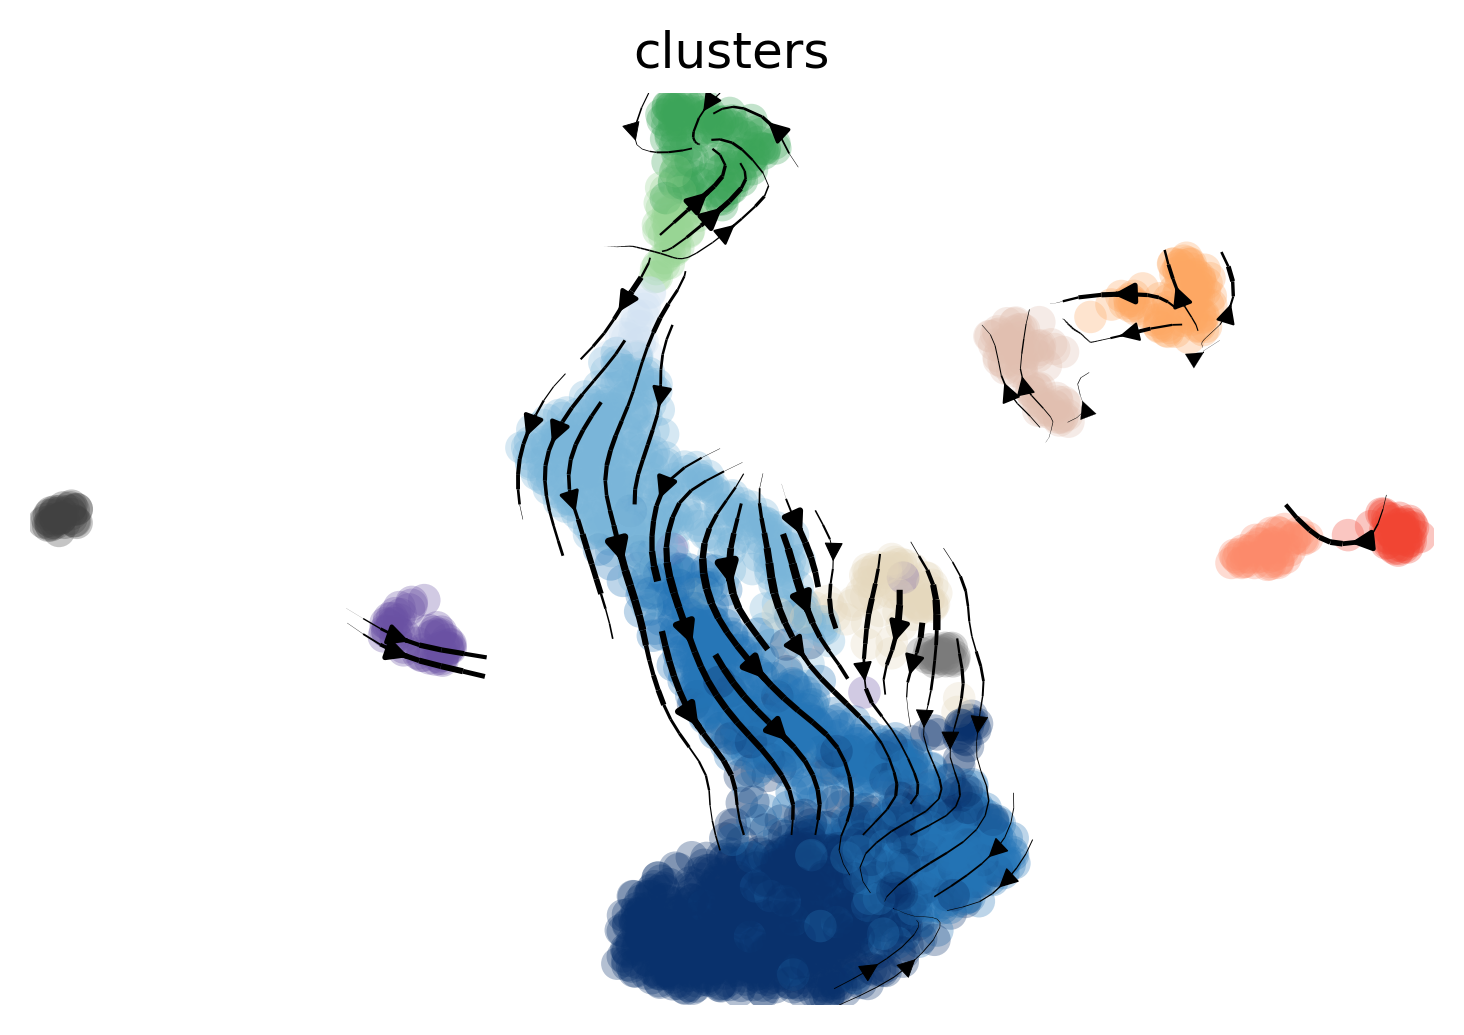

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [64, 64], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.001, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 200, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0, '

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=64, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=64, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 520224


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.001_model_[64, 64]_epochs_200.png


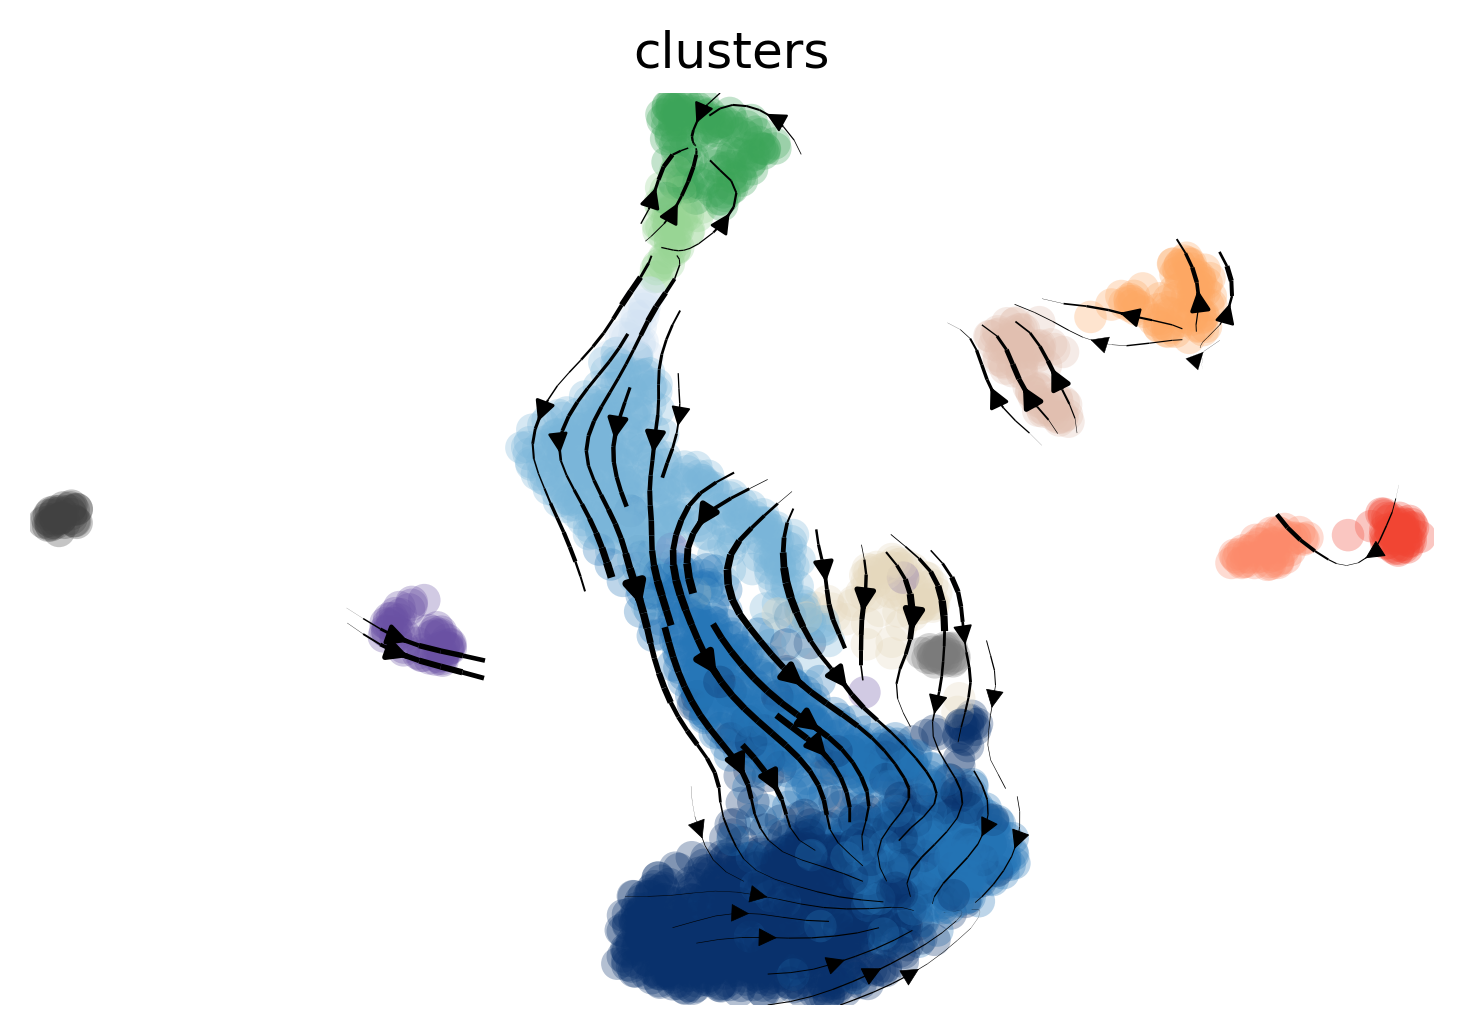

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [128, 128], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.001, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 100, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0,

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=128, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=128, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 1044640


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.001_model_[128, 128]_epochs_100.png


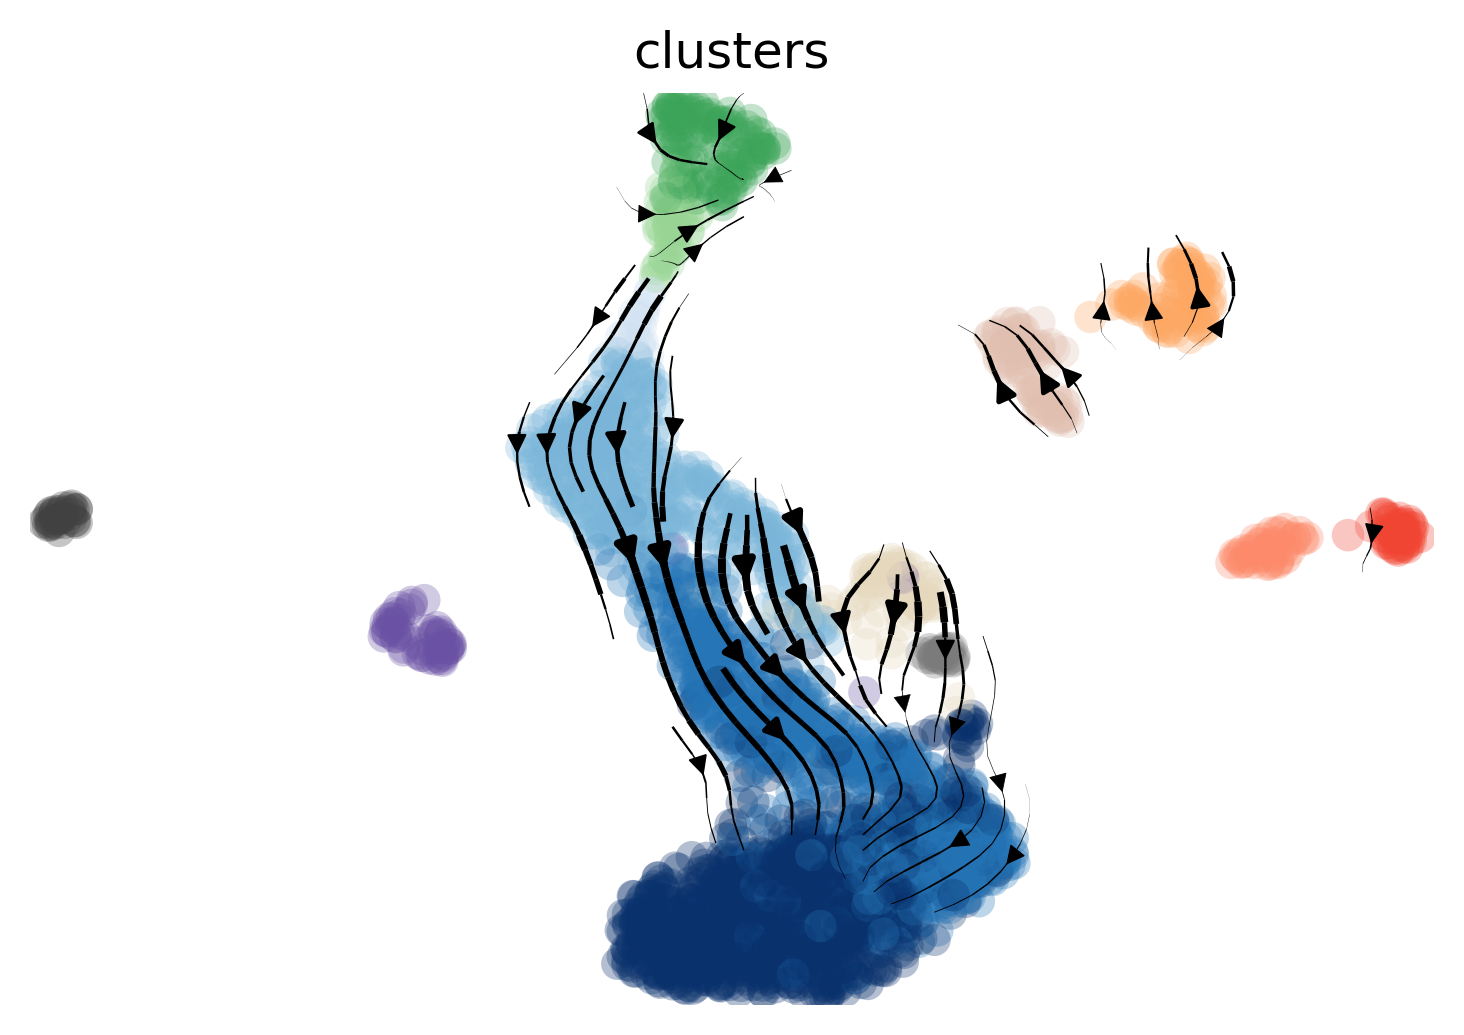

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [128, 128], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.001, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 200, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0,

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=128, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=128, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 1044640


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.001_model_[128, 128]_epochs_200.png


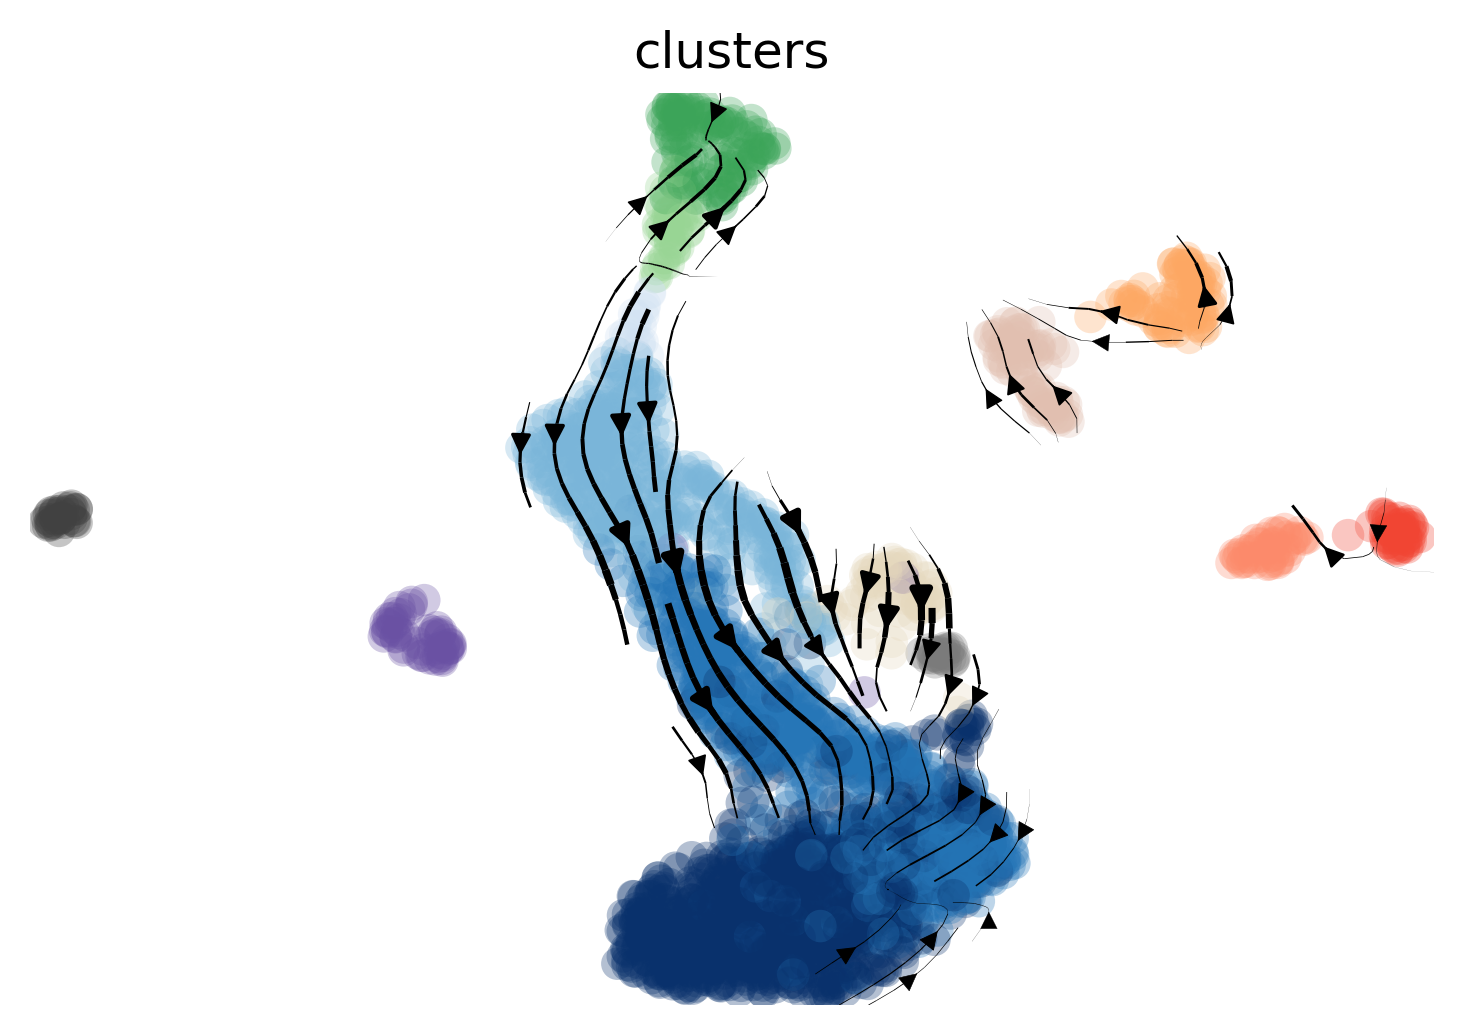

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [64, 64], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.005, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 100, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0, '

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=64, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=64, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 520224


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.005_model_[64, 64]_epochs_100.png


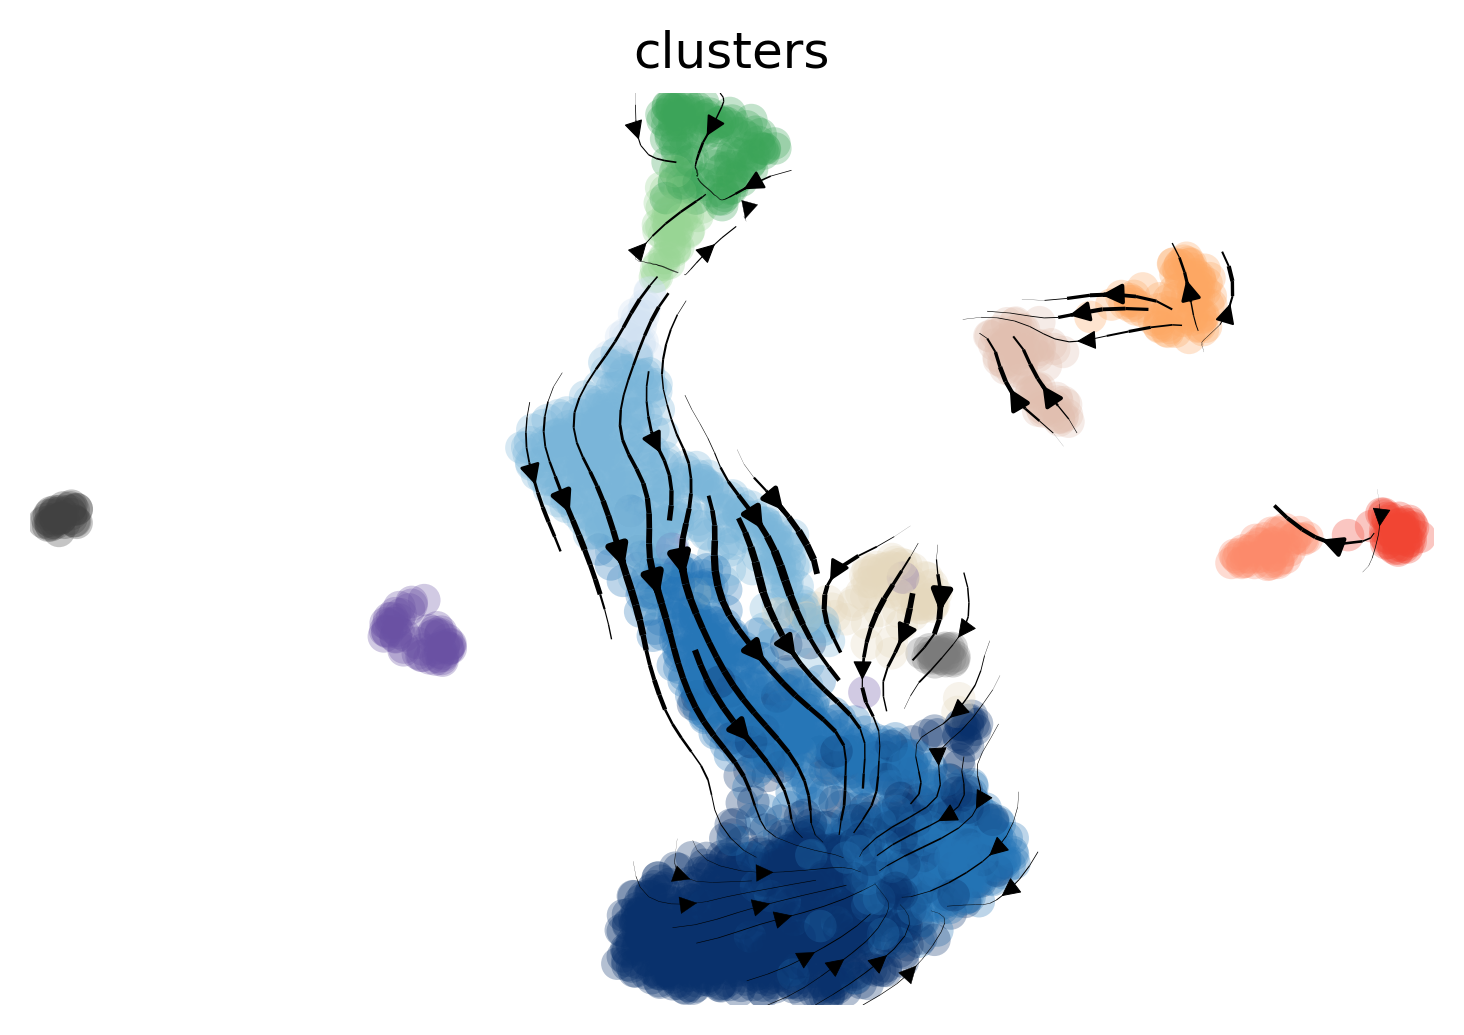

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [64, 64], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.005, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 200, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0, '

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=64, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=64, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 520224


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.005_model_[64, 64]_epochs_200.png


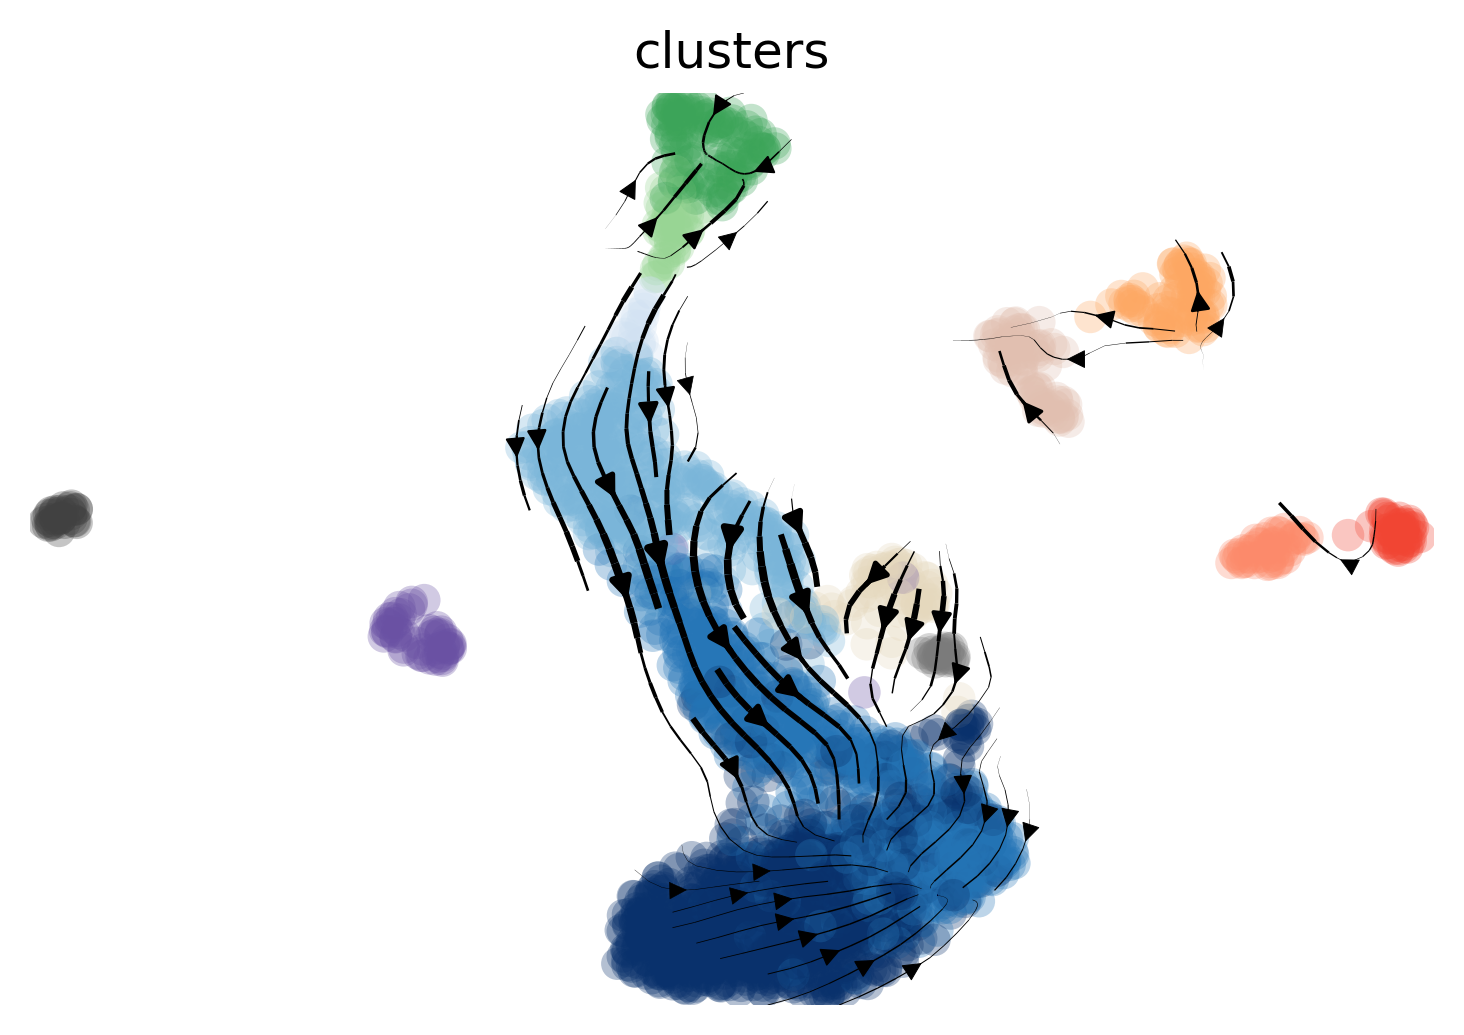

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [128, 128], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.005, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 100, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0,

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=128, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=128, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 1044640


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.005_model_[128, 128]_epochs_100.png


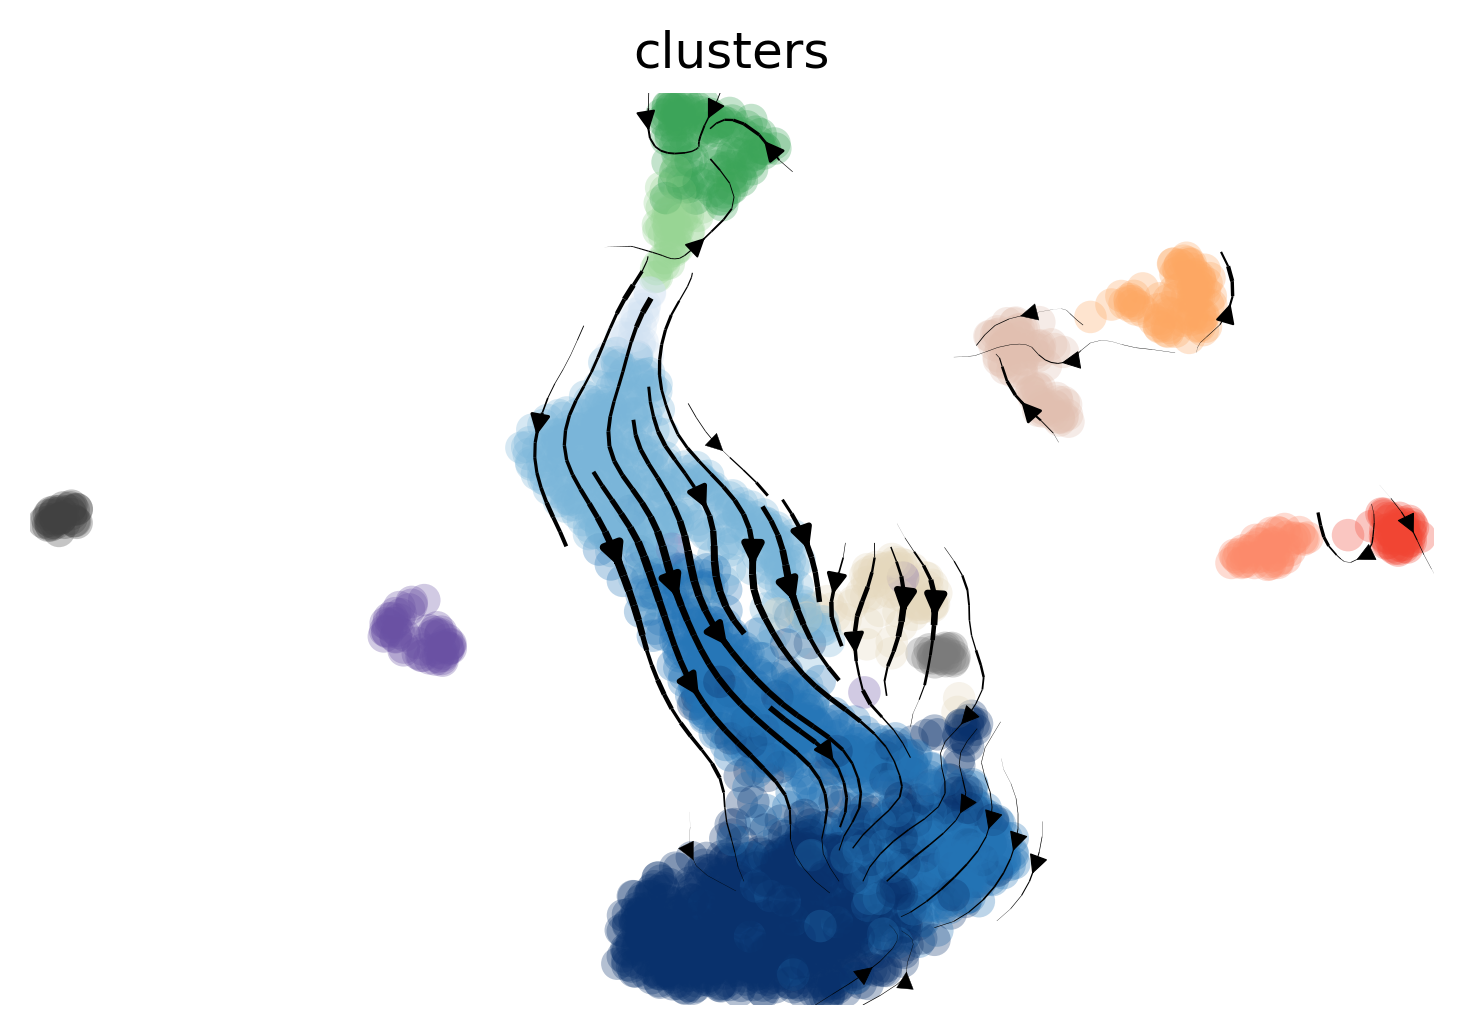

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [128, 128], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.005, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 200, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0,

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=128, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=128, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 1044640


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.005_model_[128, 128]_epochs_200.png


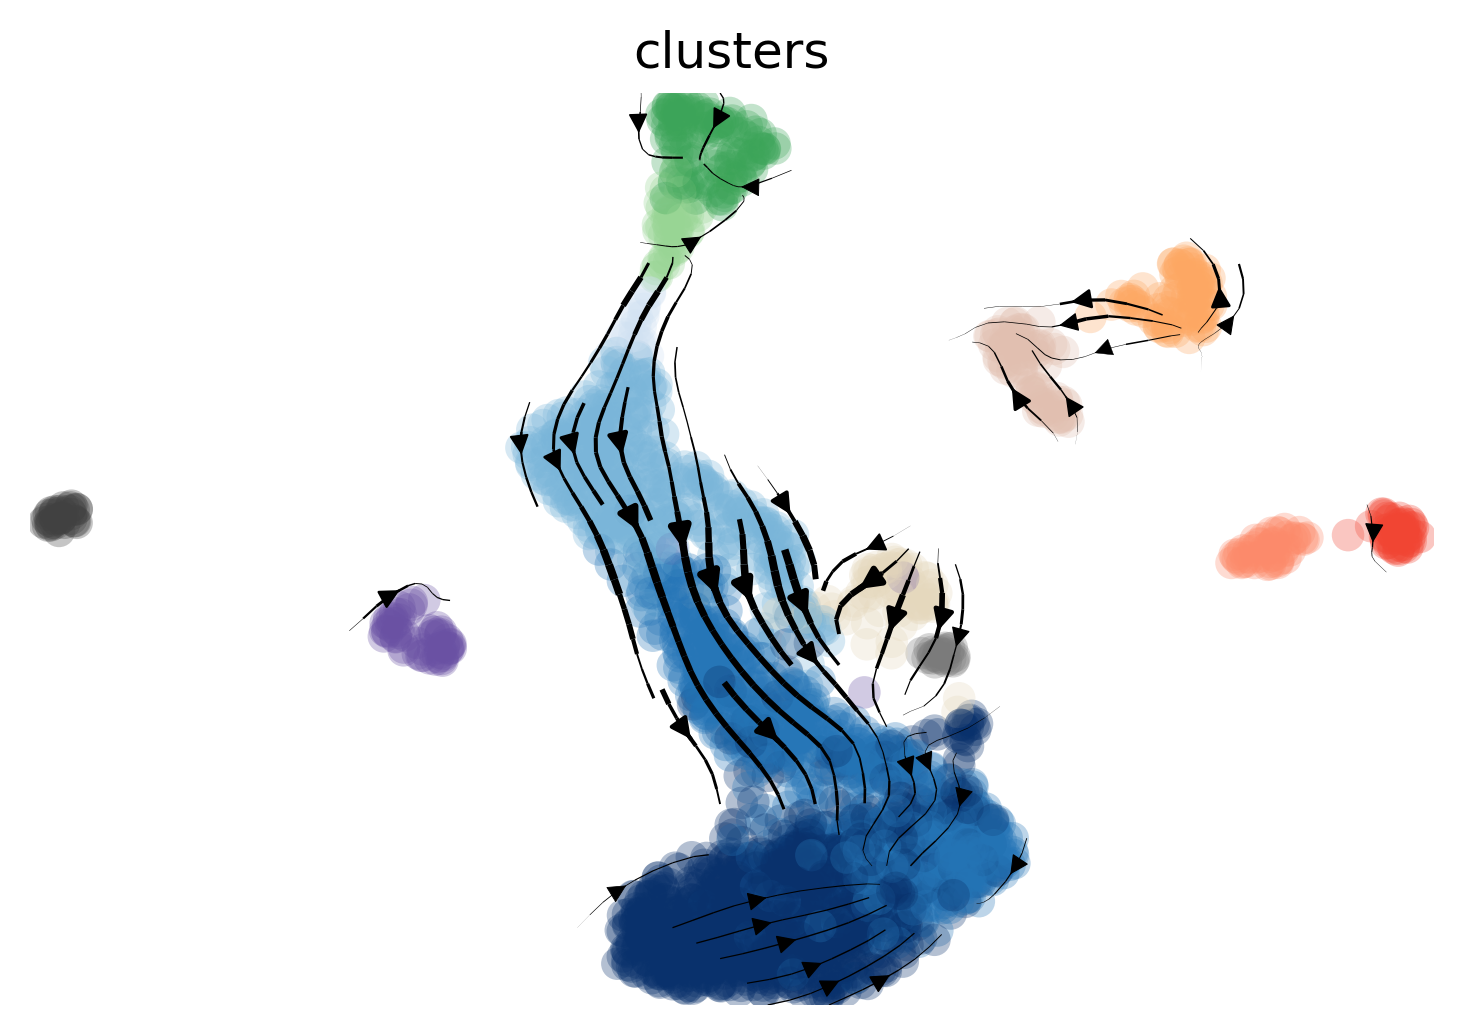

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [64, 64], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.01, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 100, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0, 'e

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=64, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=64, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 520224


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.01_model_[64, 64]_epochs_100.png


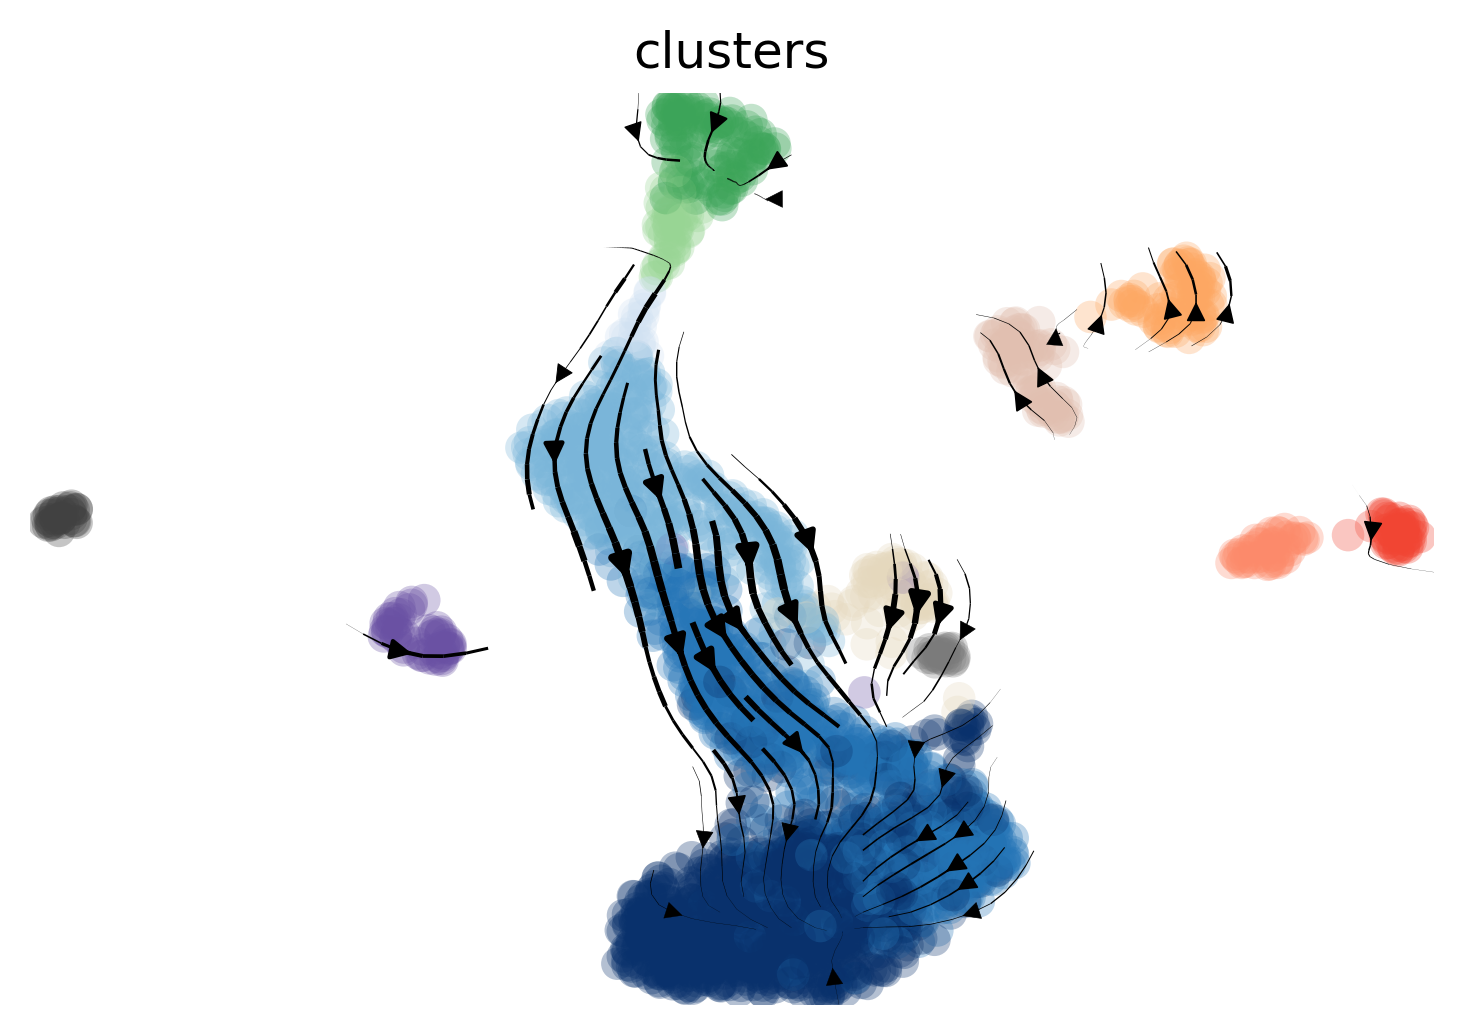

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [64, 64], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.01, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 200, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0, 'e

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=64, out=64, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=64, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 520224


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.01_model_[64, 64]_epochs_200.png


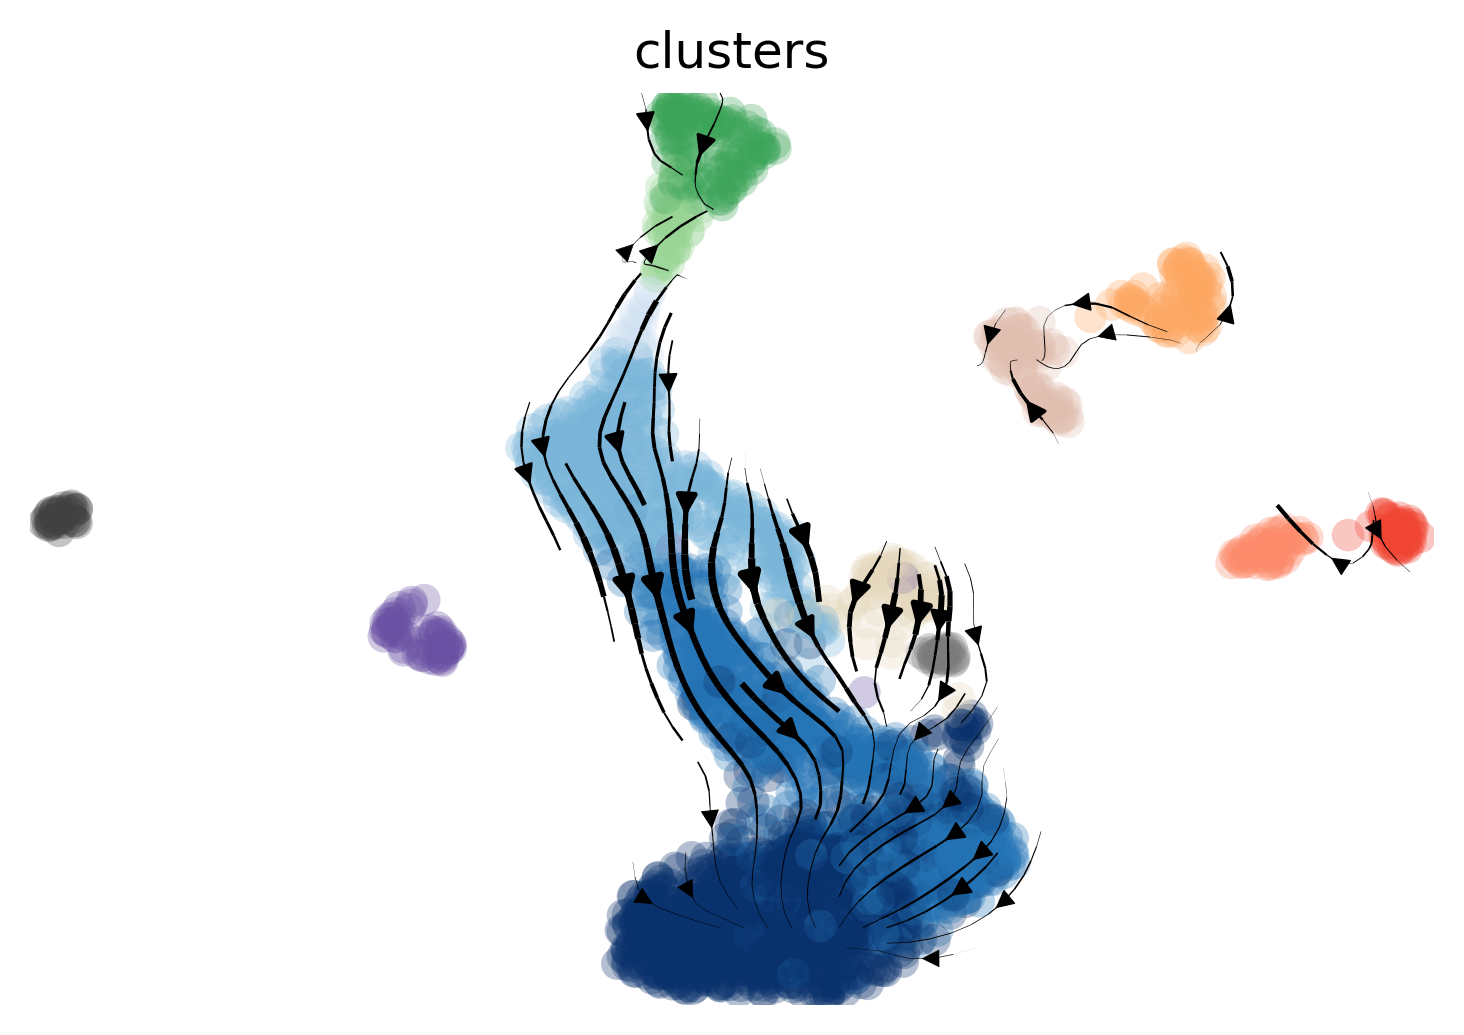

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [128, 128], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.01, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 100, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0, 

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=128, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=128, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 1044640


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.01_model_[128, 128]_epochs_100.png


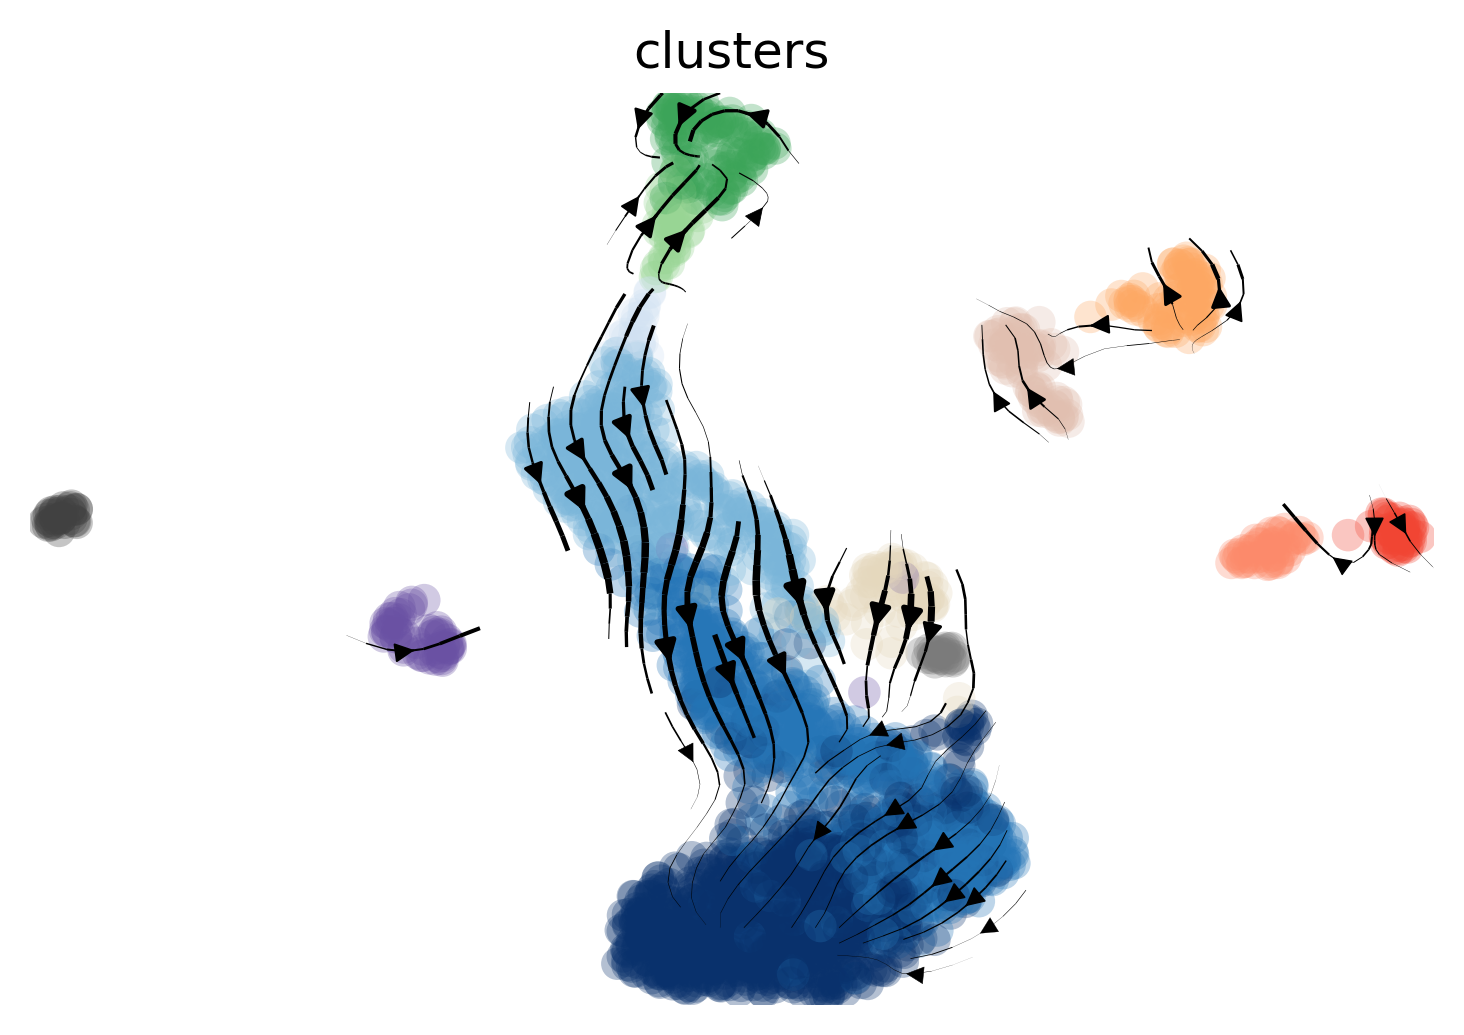

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
{'name': 'DeepVelo_Base', 'n_gpu': 1, 'arch': {'type': 'VeloGCN', 'args': {'n_genes': 2000, 'layers': [128, 128], 'dropout': 0.2, 'fc_layer': False, 'pred_unspliced': False}}, 'data_loader': {'type': 'VeloDataLoader', 'args': {'basis': 'pca', 'batch_size': 2930, 'shuffle': False, 'validation_split': 0.0, 'num_workers': 2, 'type': 'pca, t', 'topC': 30, 'topG': 20}}, 'online_test': 'velo_mat_E10-12.npz', 'optimizer': {'type': 'Adam', 'args': {'lr': 0.01, 'weight_decay': 0, 'amsgrad': True}}, 'loss': {'type': 'mle_plus_direction', 'args': {'pearson_scale': 18.0, 'coeff_u': 1.0, 'coeff_s': 1.0}}, 'constraint_loss': False, 'mask_zeros': False, 'metrics': ['mse'], 'lr_scheduler': {'type': 'StepLR', 'args': {'step_size': 1, 'gamma': 0.97}}, 'trainer': {'epochs': 200, 'save_dir': 'saved/', 'save_period': 1000, 'verbosity': 0, 'monitor': 'min mse', 'guided_epochs': 0, 

INFO:train:VeloGCN(
  (layers): ModuleList(
    (0): GraphConv(in=4000, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (1): GraphConv(in=128, out=128, normalization=both, activation=<function relu at 0x7f982508d598>)
    (2): GraphConv(in=128, out=4000, normalization=both, activation=None)
  )
  (dropout): Dropout(p=0.2, inplace=False)
)
Trainable parameters: 1044640


velo data shape: torch.Size([2930, 2000])
velo_mat shape: (2930, 2000)
--> added 'velocity' (adata.layers)
--> added 'velocity_unspliced' (adata.layers)
--> added 'cell_specific_beta' (adata.layers)
--> added 'cell_specific_gamma' (adata.layers)
computing velocity graph (using 8/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file saved/robustness/lr_0.01_model_[128, 128]_epochs_200.png


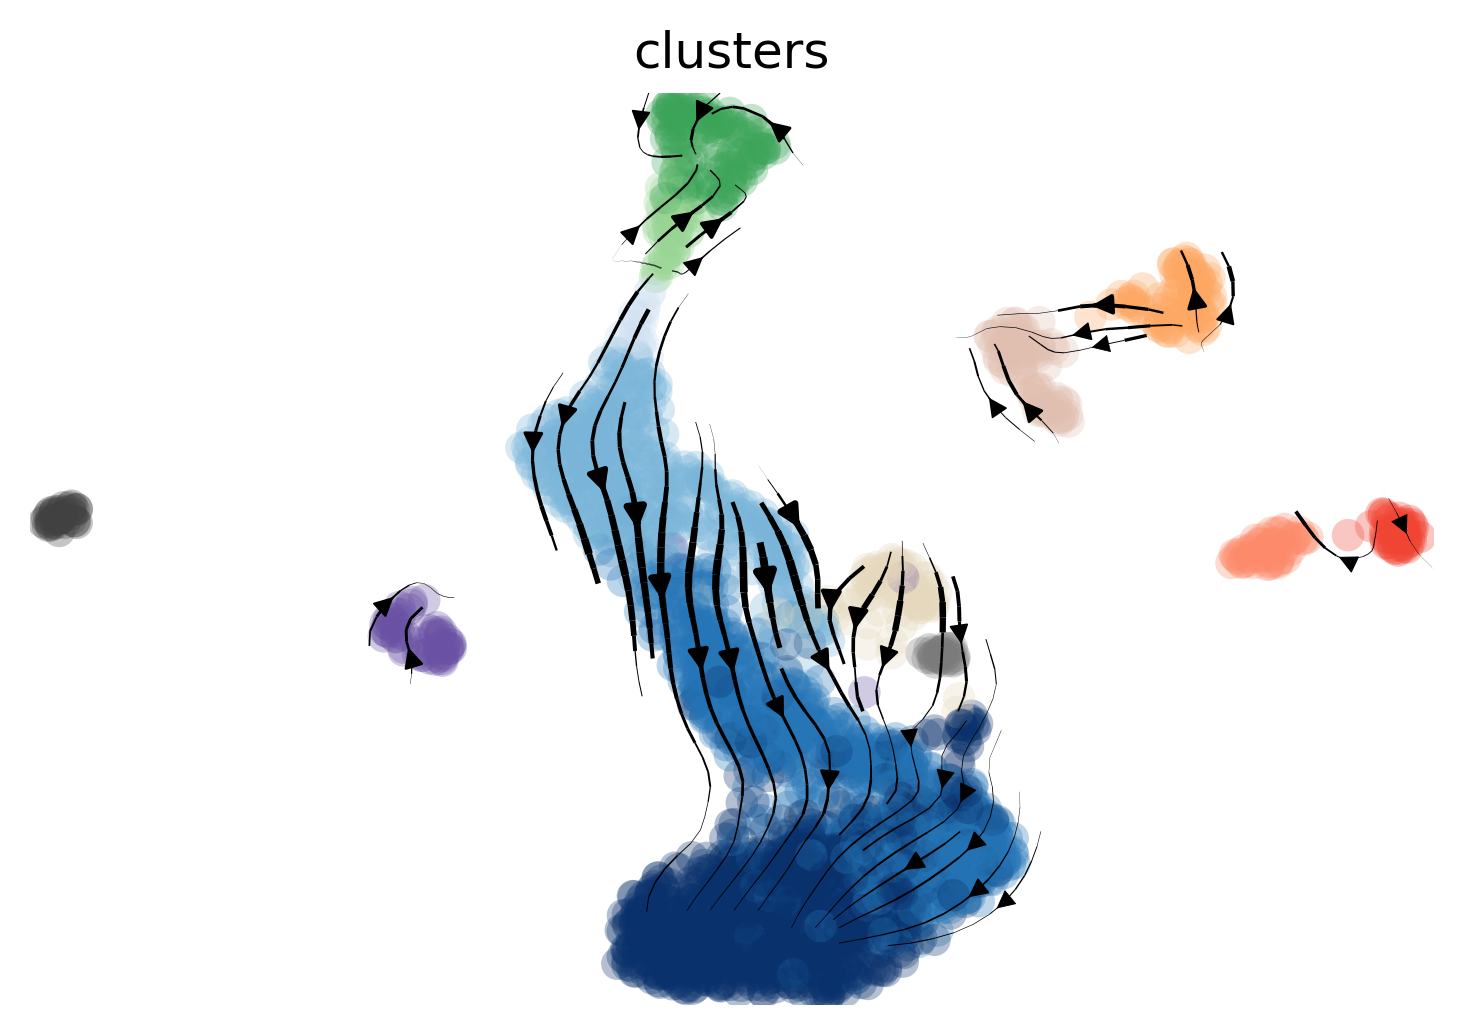

In [4]:
save_dir = Path("saved") / "robustness"
save_dir.mkdir(exist_ok=True)
for lr in [0.001, 0.005, 0.01]:
    for model_size in [[64, 64], [128, 128]]:
        for epochs in [100, 200]:
            configs = {
                "data_loader": {"args": {"type": "pca, t"}},
                "arch": {"args": {"layers": model_size}},
                "loss": {"args": {"coeff_u": 1.0, "coeff_s": 1.0}},
                "optimizer": {"args": {"lr": lr}},
                "trainer": {"epochs": epochs, "verbosity": 0},
            }
            configs = update_dict(Constants.default_configs, configs)
            save_path = save_dir / f"lr_{lr}_model_{model_size}_epochs_{epochs}.png"
            test(adata, configs, str(save_path))
